# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [36]:
import time
import pandas as pd
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, RocCurveDisplay,recall_score, precision_score, precision_recall_curve,f1_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SVMSMOTE


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
df_used = df.iloc[:,0:7]
df_used['y'] = df['y']
df_used

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [9]:
# todo LabelEncoder job, marital, education, default,housing,loan
df_used = df_used.dropna()

def encode_columns(dataFrame, columns, encoder):
    for column in columns:
        dataFrame[column] = le.fit_transform(dataFrame[column])
    
le = LabelEncoder()
columns = ['job','marital','education','default','housing','loan']

encode_columns(df_used, columns, le)

df_corr = df_used.iloc[:]
df_corr['y']= le.fit_transform(df_corr['y'])
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,job,marital,education,default,housing,loan,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.004909
y,0.030399,0.025122,0.046203,0.057799,-0.099352,0.011552,-0.004909,1.000000


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
X = df_used.drop('y', axis=1)
y = df_used['y']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.35, random_state=42)

In [11]:
y_test.value_counts()

no     12782
yes     1634
Name: y, dtype: int64

<AxesSubplot:>

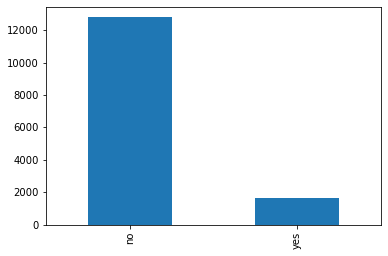

In [12]:
y_test.value_counts().plot(kind='bar')

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto')
sfs.fit_transform(X, y)

array([[3, 0, 0],
       [7, 1, 0],
       [7, 0, 0],
       ...,
       [5, 0, 0],
       [9, 0, 0],
       [5, 0, 0]])

In [14]:
print(sfs.get_feature_names_out())

['job' 'default' 'loan']


#### SFS with 'auto' selection only picked three features

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### Using Zero Rate Classifier to build a baseline classifier

In [15]:
y_test.value_counts(normalize=True)

no     0.886654
yes    0.113346
Name: y, dtype: float64

In [ ]:
plt.

In [33]:
print( 'Baseline using ZeroR Classifier: ' , y_test.value_counts(normalize=True)['no'])

odds_of_no_pred  =  y_test.value_counts(normalize=True)['no'] ** 2
odds_of_yes_pred =  y_test.value_counts(normalize=True)['yes'] ** 2

print( 'Baseline using Random Rate Classifier : ',
      odds_of_no_pred + odds_of_yes_pred)

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_clf.predict(X_test)
print('Baseline using sklearn Dummy Classifier: ' , dummy_clf.score(X_test, y_test))

Baseline using ZeroR Classifier:  0.88665371809101
Baseline using Random Rate Classifier :  0.7990021954272044
Baseline using sklearn Dummy Classifier:  0.88665371809101


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [40]:
lgr = LogisticRegression(max_iter = 1000).fit(X_train,y_train)
lgr_preds = lgr.predict(X_test)
log_reg_mat  = confusion_matrix(y_test, lgr_preds, labels=lgr.classes_)
print(log_reg_mat)

[[12782     0]
 [ 1634     0]]


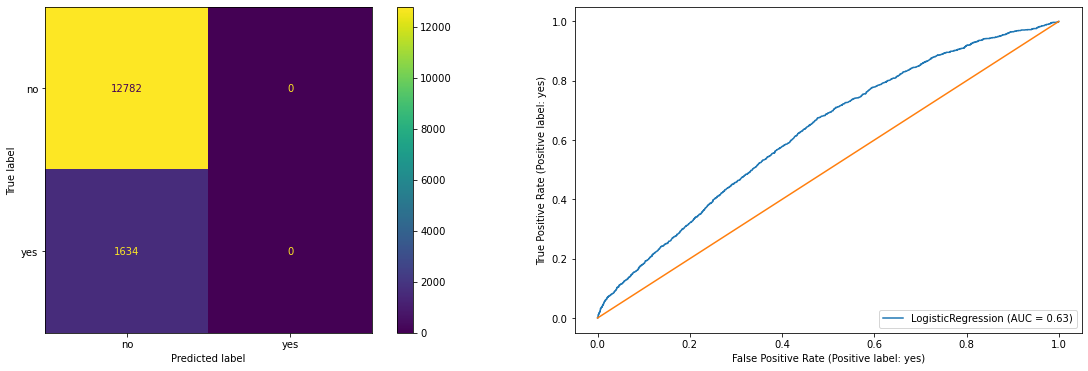

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
print('Simple model Logistic Regression score: ', lgr.score(X_test, y_test))

Simple model Logistic Regression score:  0.88665371809101


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [37]:
def train_test_models(X_train,X_test, y_train, y_test):
    # Define models to train
    names = ["Logistic Regression", "KNeighbors Classifier",
             "Decision Tree",
             "SVM"
            ]

    #Define classifiers
    classifiers = [
        LogisticRegression(max_iter = 1000),
        KNeighborsClassifier(n_neighbors = 3),
        DecisionTreeClassifier(),
        SVC(kernel = 'linear')
    ]

    models = zip(names, classifiers)
    results = []

    for name, model in models:
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        training_time = end-start
        predictions = model.predict(X_test)
        train_score = model.score(X_train,y_train)
        test_score  = model.score(X_test,y_test)
        print(name,training_time,train_score,test_score)
        results.append([name,training_time,train_score,test_score])
    return results


results = train_test_models(X_train,X_test, y_train, y_test)
results_df = pd.DataFrame(results, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])
results_df.set_index('Model', inplace=True,drop=True)
results_df

Logistic Regression 0.21715903282165527 0.8877185118780816 0.88665371809101
KNeighbors Classifier 0.039443016052246094 0.8908561183325863 0.8611265260821309
Decision Tree 0.062196969985961914 0.9196175108322128 0.8605715871254163
SVM 28.479882955551147 0.8877185118780816 0.88665371809101


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.217159,0.887719,0.886654
KNeighbors Classifier,0.039443,0.890856,0.861127
Decision Tree,0.062197,0.919618,0.860572
SVM,28.479883,0.887719,0.886654


#### Observations:
- Logistic Regression and SVM have train and test scores equal or more than baseline
-  Both KNeighbor CLassifier and Decision Tree Classifier have higher training score than baseline and test scores are below baseline

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Will not be using these feature because there is no correlation with the outcome
- contact
- month
- day_of_week
- duration
- campaign
- emp.var.rate   
- cons.price.idx  
- cons.conf.idx 
- euribor3m   
- nr.employed

#### Will be using these additional features to test improvements
- pday
- previous
- poutcome


In [35]:
needed_features = ['age', 'job','marital','education','default','housing','loan','pdays','previous','poutcome','y']
columns_to_encode = ['job','marital','education','default','housing','loan','poutcome']
df_improve = df[needed_features]
# df_improve
le = LabelEncoder()

encode_columns(df_improve, columns_to_encode, le)

df_corr_improve = df_improve.iloc[:]
df_corr_improve['y']= le.fit_transform(df_improve['y'])
corr_improve = df_corr_improve.corr()
corr_improve.style.background_gradient(cmap='coolwarm')

/var/folders/nv/917rccsn3690zmfyk2f31vj80000gn/T/ipykernel_57724/1177205400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[column] = le.fit_transform(dataFrame[column])


,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,-0.034369,0.024365,0.019750,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.028468,0.020965,0.011504,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.037942,0.038689,0.001912,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.046626,0.038831,0.017009,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.080062,-0.102416,0.023417,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.010551,0.021314,-0.011783,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,0.000345,-0.001327,-0.001511,-0.004909
pdays,-0.034369,-0.028468,-0.037942,-0.046626,0.080062,-0.010551,0.000345,1.000000,-0.587514,-0.475619,-0.324914
previous,0.024365,0.020965,0.038689,0.038831,-0.102416,0.021314,-0.001327,-0.587514,1.000000,-0.313110,0.230181
poutcome,0.019750,0.011504,0.001912,0.017009,0.023417,-0.011783,-0.001511,-0.475619,-0.313110,1.000000,0.129789


In [36]:
X_improve = df_improve.drop('y', axis=1)
y_improve = df_improve['y']

X_train_improve, X_test_improve, y_train_improve, y_test_improve = train_test_split(X_improve , y_improve, test_size = 0.35, random_state=42)
results = train_test_models(X_train_improve, X_test_improve, y_train_improve, y_test_improve)
results_df_improve = pd.DataFrame(results, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])
results_df_improve.set_index('Model', inplace=True,drop=True)
results_df_improve

Logistic Regression 0.29360079765319824 0.898438667264306 0.896711986681465
KNeighbors Classifier 0.04070019721984863 0.9059091588226506 0.8763873473917869
Decision Tree 0.06688785552978516 0.9415060510981622 0.8614733629300777


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.293601,0.898439,0.896712
KNeighbors Classifier,0.040700,0.905909,0.876387
Decision Tree,0.066888,0.941506,0.861473


In [26]:
def grid_search(X_train,X_test, y_train, y_test):
    # Define models to train
    names = ["Logistic Regression", "KNeighbors Classifier",
             "Decision Tree", "SVM"]

    #Define classifiers
    classifiers = [
        LogisticRegression(max_iter = 1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        SVC()
    ]
    
    distributions = [
             {'C' :[100, 10, 1.0, 0.1, 0.01]},
             {'n_neighbors' : range(1, 21, 2),'weights' :['uniform', 'distance'],'metric' : ['euclidean', 'manhattan', 'minkowski']},
             {'max_depth': [5, 10, 15, 20]},
             {'kernel': ['poly', 'rbf', 'sigmoid'], 'C' : [50, 10, 1.0, 0.1, 0.01],'gamma' : ['scale']}
    ]
    
    models = zip(names, classifiers, distributions)
    results = []

    for name, model, distribution in models:
        rscv          = RandomizedSearchCV(model.fit(X_train, y_train), param_distributions=distribution).fit(X_train, y_train)
        training_time = rscv.cv_results_['mean_fit_time']
        predictions   = rscv.predict(X_test)
        test_score    = rscv.cv_results_['mean_test_score']
        train_score   = model.score(X_train,y_train)
        print(name,training_time,train_score,test_score,rscv.best_params_)
        results.append([name,training_time,train_score,test_score])
    return results

results = grid_search(X_train,X_test, y_train, y_test)
results_df = pd.DataFrame(results, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])
results_df.set_index('Model', inplace=True,drop=True)
results_df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression [0.14848394 0.17274871 0.20502405 0.17613664 0.1908144 ] 0.8877185118780816 [0.88771852 0.88771852 0.88771852 0.88771852 0.88771852] {'C': 100}
KNeighbors Classifier [0.03722739 0.03406529 0.03387365 0.03223348 0.03166232 0.03171825
 0.03188677 0.03231134 0.033705   0.03316278] 0.8917525773195877 [0.88644863 0.87266553 0.81185555 0.88682214 0.87587786 0.81185555
 0.87494405 0.81148201 0.87494405 0.87587786] {'weights': 'uniform', 'n_neighbors': 19, 'metric': 'euclidean'}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree [0.03553057 0.04329476 0.04983206 0.05154443] 0.9196175108322128 [0.88738238 0.88297487 0.87520548 0.863066  ] {'max_depth': 5}
SVM [5.01903019e+00 2.82580401e+02 7.20307452e+01 3.35583463e+00
 3.37396658e+03 5.23202801e+00 4.64214540e+00 9.14492702e+00
 4.92768764e+00 5.16017461e+00] 0.8877185118780816 [0.80670111 0.88771852 0.88786792 0.88771852 0.88771852 0.88771852
 0.88771852 0.88771852 0.80886756 0.8262365 ] {'kernel': 'rbf', 'gamma': 'scale', 'C': 50}


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,"[0.148483943939209, 0.17274870872497558, 0.205...",0.887719,"[0.887718515123644, 0.887718515123644, 0.88771..."
KNeighbors Classifier,"[0.03722739219665527, 0.03406529426574707, 0.0...",0.891753,"[0.8864486250234125, 0.8726655289185776, 0.811..."
Decision Tree,"[0.03553056716918945, 0.043294763565063475, 0....",0.919618,"[0.8873823806698624, 0.8829748659518595, 0.875..."
SVM,"[5.01903018951416, 282.5804011821747, 72.03074...",0.887719,"[0.8067011060432142, 0.887718515123644, 0.8878..."


0.8877185118780816 0.88665371809101
[[12782     0]
 [ 1634     0]]


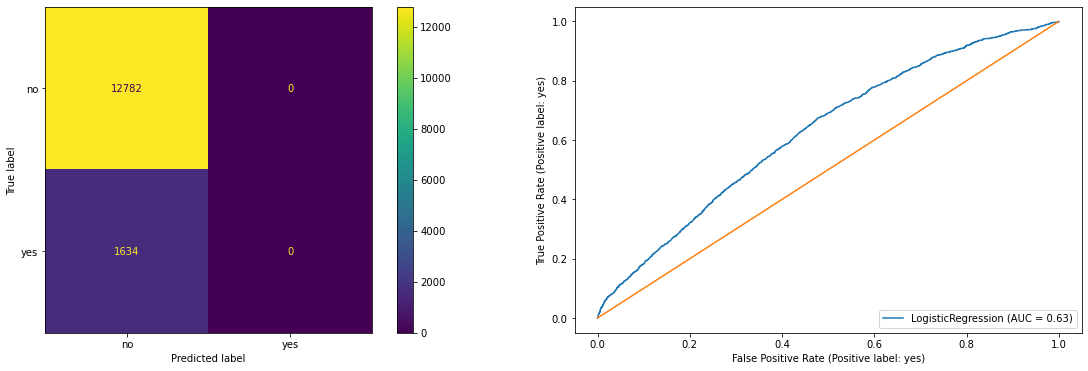

In [43]:
lgr = LogisticRegression(C = 100).fit(X_train,y_train)
lgr_preds = lgr.predict(X_test)
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)

print(lgr_train_score,lgr_test_score )

log_reg_mat  = confusion_matrix(y_test, lgr_preds, labels=lgr.classes_)
print(log_reg_mat)

fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

In [28]:
knn = KNeighborsClassifier(n_neighbors= 19,metric='euclidean',weights='uniform').fit(X_train,y_train)
knn.predict(X_test)
knn_train_score = knn.score(X_train,y_train)
knn_test_score = knn.score(X_test,y_test)

print(knn_train_score,knn_test_score )

0.8892499626475422 0.8872086570477248


In [31]:
dclf = DecisionTreeClassifier(max_depth= 5).fit(X_train,y_train)
dclf.predict(X_test)
dclf_train_score = dclf.score(X_train,y_train)
dclf_test_score  = dclf.score(X_test,y_test)

print(dclf_train_score,dclf_test_score )

0.8886896757806664 0.8871392896781354


## Findings:
  - These are the steps followed to compare the performance of the classifiers K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.

## Data Preperation
   - Initially used these features: age, job, marital,	education, default, housing, loan as suggested.
   - Just for experimental purposes, SequentialFeatureSelector is used with n_features_to_select='auto' (auto selection), it selected only three features: job, default, loan.
   - Then used data frame is split into train and test sets in 65/35 ratio.
   - Label encoder is used to convert non-numeric feature values to numeric values
   

## Baseline:
   - __To create a baseline, 3 approaches were taken__
        1. Using ZeroR Classifier, by calculating the percentage of maximumum class "no" in yes & no classes.
        2. Using Random Rate Classifier, by adding weights and writing a user function.
        3. Using using sklearn Dummy Classifier.
   - __Observations__
     - Baseline using ZeroR Classifier:  0.88665371809101
     - Baseline using Random Rate Classifier :  0.7990021954272044
     - Baseline using sklearn Dummy Classifier:  0.88665371809101
   
   - __Objective: K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines models should beat the baseline 88% (stated above)__

        
## Basic Model performace before tuning
 - __Observations:__
    1. Logistic Regression and SVM have train and test scores equal or more than baseline
    2. Both KNeighbor CLassifier and Decision Tree Classifier have higher training score than baseline but test scores are below baseline

## More feature engineering and exploration
__NOTE: age is not provided in the dataset__
   - Will not be using these feature because there is no correlation with the outcome
    - contact, month, day_of_week, duration, campaign, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
   - Will be using these additional features to test improvements
    - pday, previous, poutcome

__Observations:__
   - Test scores of K Nearest Neighbor, Decision Trees did not increase, they are still below baseline.
   

## Grid Search for optimal hyper parameters
  - Used RandomizedSearchCV for optimal hyper parameter search
  - Search results for K Nearest Neighbor Optimal hyper params are {'weights': 'uniform', 'n_neighbors': 19, 'metric': 'euclidean'}
  - Search results for Decision Trees hyper params are {'max_depth': 5}
  - Applied optimal hyper paramters to K Nearest Neighbor, Decision Trees and the results are promising, both models beat out baseline.
  

## Conclusion:
  - Right Off the bat, Logistic Regression, and Support Vector Machines performance is better than baseline.
  - K Nearest Neighbor and Decision Trees did not perform better than baseline and adding more features did not help.
  - Used RandomizedSearchCV to search optimal hyper parameter.
  - the performace of K Nearest Neighbor and Decision Trees increased by using optimal hyper parameters suggested by RandomizedSearchCV.
  - SVC/SVM took more than few hours to train with extra features
  - Searching for hyper parameters for SVC/SVM took more than 10 hours, really slow to train and search for optimal params.
  - Simple model Logistic Regression performed well with this dataset.
  - None of the model scores exceeded 90% even after tuning.
  - Data is very imbalanced, we can use SVMSMOTE to created balanced classed to improve precision
    -  REf: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html

##### Questions